# Introduction

  OpenCV.  I love you and I hate you.  My tutorial is focused on using openCV in python, but most of opencv is actually written in C.  What does this mean?  If you are used to using conda to install packages, the results can be inconsistent based on whomever has last updated the binaries appropriate for your system.
  
Originally this class was going to be based on raspberry pi, and all of these commands should work for raspberry pi.  The astute among you may notice this is not in raspberry pi, mainly because the install takes considerable time since you must build the binaries using C.  This takes 5-8 hours.  

PyImageSearch has a lot of good tutorials for doing this [here](https://www.pyimagesearch.com/opencv-tutorials-resources-guides/)

The other major issue that comes up is there are several versions of opencv out there.  This means that despite there best efforts not all commands are consistent between versions.  Which also means that many tutorials and resources are not plug and play - if you can figure out the version you can figure out what the command is.

For the record this tutorial is based on opencv3 which is the latest "stable" version.  Opencv4 is on the way.

Finally I assume the audience is at least somewhat familiar with python3 and file dirs.

## Importing and Hello World

In [76]:
# For python developers, yes I know * import is horrible.
from cv2 import *
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [35]:
print(cv2.__version__)

3.4.2


Yup. You import `cv2` but it is cv3.

In [2]:
# Defining a place to store everything.  You will need to change this to point to a place
# in your file directory
base_dir = '/Users/lehassell/documents/jup_notebooks/open_cv_dir/'

In the next cell we use opencv to take an image using whatever camera is available.

In [47]:
cam = VideoCapture(0)   # 0 -> index of camera.  This should be OS agnostic
s, img = cam.read()

if s:    # frame captured without any errors
    imwrite((base_dir + "filename.jpg"),img) #save image


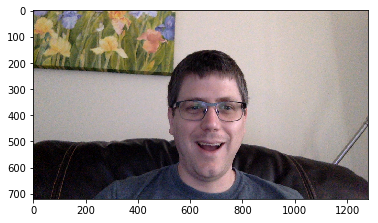

In [48]:
plt.imshow(cvtColor(img, COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

I'm a simple man and its the simple things that make me happy.

## What happened?

We started by telling opencv which camera to use and then took a picture.  Of course a digital photo is a matrix of numbers that represent pixel values.  In this case they are stored in a structure called a numpy array.

In [49]:
print(s)
print(type(img))

True
<class 'numpy.ndarray'>


In data science, numpy arrays are everywhere.  At first this seems like a non-sequitor but what it really means it that this data structure is used in a lot of libraries beyond just opencv.

In [50]:
img.shape

(720, 1280, 3)

What do we have here then?  The `.shape` shows the size of the array.  We have a `720 x 1280` thats `3` layers deep.    
The 3 layers represent the RGB layers.

`imwrite` tells the library to save it out to a file at a destination of our choosing.  
I then call `plt.imshow()` to display it within the notebook.  Likely when we are running this off a webcam for monitoring purposes we will follow these commands different.  

Embedded in the `imshow()` call I have a command `cvt_color` that converts the photo between colorspaces (in this case `BGR2RGB` or BLUE GREEN RED to RED GREEN BLUE)

## Basic Image Manipulation

I know most people are here for the more advanced features, but grasping the basics will make using the more advanced features much easier to use.

In [56]:
# Example Resizing.  I get the HxW for use in the calculations
height, width = img.shape[:2] # The :2 indicates to just take the first two parts of the shape return
res = cv2.resize(img,(int(width/2), int(height/2)), interpolation = cv2.INTER_CUBIC)


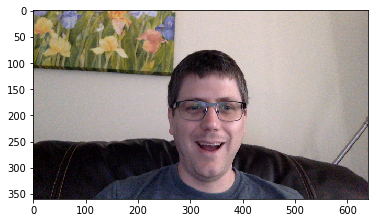

In [58]:
plt.imshow(cvtColor(res, COLOR_BGR2RGB))
plt.show()

In [57]:
res.shape

(360, 640, 3)

In [62]:
# Example Rotation
rows, cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img, M,(cols,rows))

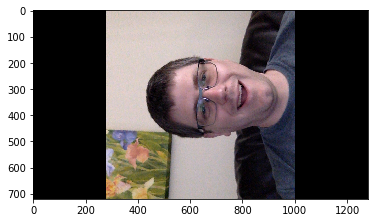

In [63]:
plt.imshow(cvtColor(dst, COLOR_BGR2RGB))
plt.show()

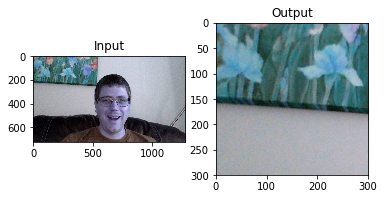

In [64]:
rows, cols, ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img, M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Why does this matter?  It helps when processing oversized photos that are returned from most decent digital cameras.  You can pare down photos and only save what you are interested in.

Its worth saying that these are pretty basic numpy array manipulations - so if you know numpy (and many people using this library/writing tutorials do) then you will likely prefer the numpy commands.

## Example Workflow

So at this stage, you've probably looked at my face enough.  I thought it would be more interesting to dig out an old project I had to demonstrate more of OpenCV's features.

In [79]:
original_img = imread(base_dir + 'nems.jpg', 0)

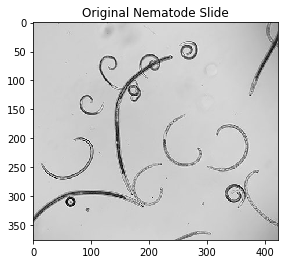

In [80]:
plt.imshow(original_img, cmap=cm.Greys_r)
plt.title('Original Nematode Slide')
plt.show()

Those are nematodes.  They are aquatic creatures that drown in too much water.

Why do I have a project for them?  Nematodes are also a major plant pathogen.  Part of a management program involves taking soil samples, identifying any disease causing nematodes, and then taking counts to determine if they are above a certain threshold.  

In a typical soil lab, its someone's job to sit at a microscope 40 hours a week and do this.

My goal for this project was to investigate if nematodes can be found, identified, and counted automatically.

I need to begin the process of extracting meaningful information. As I recall most nematode assays are done with only the microscope backlight on (this means they are grey scale). I will start by removing noise from the image and select out the foreground.



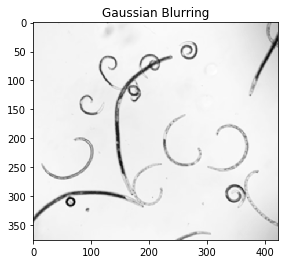

In [88]:
img = original_img.copy()
blurred = GaussianBlur(img, (5, 5), 0)
thresh, th1 = threshold(blurred, 0, 255, THRESH_BINARY_INV + THRESH_OTSU)
plt.imshow(blurred, cmap=cm.Greys_r)
plt.title('Gaussian Blurring')
plt.show()

I ran multiple commands in the last block and this demonstrates the first of them. I applied a Gaussian blurr to smooth out the image. This removes jagged edges and any small pieces of debris (things smaller than a few pixels).

This next image shows what happens after I applied a thresholding algorithm. The goal here was to highlight the pixels that were 'brighter' than the background. The method used is called the otsu threshold and takes the distribution of pixel brightness frequency and creates two classes that minimize intra-class variance.

The redline determines what is a real pixel.  All the lines to the left of the line, will be removed.

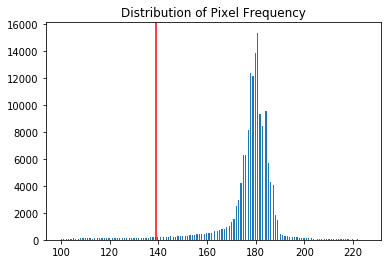

In [106]:
plt.hist(original_img.ravel(),256,[100,225])
plt.title('Distribution of Pixel Frequency')
plt.axvline(thresh, color='red')
plt.show()

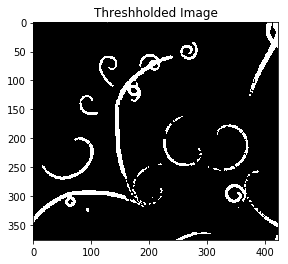

In [89]:
plt.imshow(th1, cmap=cm.Greys_r)
plt.title('Threshholded Image')
plt.show()

At this point I should be ready to have my program find the contours of objects in the image. The program will pick anything in the foreground (the white) and note the bounds.

In [93]:
image, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_1 = copy.deepcopy(original_img)
img_2 = copy.deepcopy(original_img)
print(len(contours))

62


The print line tells me how many total objects/contours the program has detected - 62. That seems a bit high, lets visualize the contours by putting a minimum bounding circle around each object.

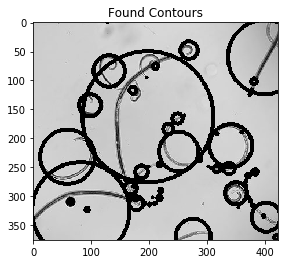

In [95]:
for cnt in contours:
        (x, y), radius = minEnclosingCircle(cnt)
        center = (int(x), int(y))
        radius = int(radius)
        circle_image = circle(img_1, center, radius, (0, 255, 0), 5)

plt.imshow(circle_image, cmap=cm.Greys_r)
plt.title('Found Contours')
plt.show()

It definitely seems to be finding objects. However there are a lot of little circles for objects we aren't concerned with. Lets try setting only minimum radii.

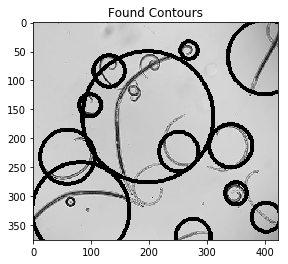

In [96]:
for cnt2 in contours:
        (x, y), radius = minEnclosingCircle(cnt2)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 12:
            circle_image_2 = circle(img_2, center, radius, (0, 255, 0), 5)

plt.imshow(circle_image_2, cmap=cm.Greys_r)
plt.title('Found Contours')
plt.show()

By limiting the size of the radius, we were able to help focus where the program looks. If all we wanted to do is count nematodes then this is probably not a bad place to get the model to. It got 12 out of 15 (80%). The user can simply add missing worms to the tally with a quick visual assessment.

Demo with two other photos:

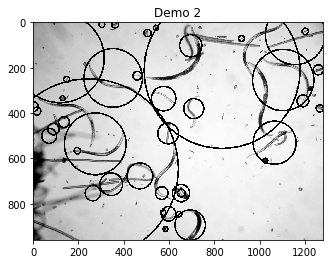

In [97]:
filename_2 = base_dir + 'nems3_circle.jpg'
demo_2 = imread(filename_2, 0)

filename_3 = base_dir + 'nems4_circle.jpg'
demo_3 = imread(filename_3, 0)

plt.imshow(demo_2, cmap=cm.Greys_r)
plt.title('Demo 2')
plt.show()

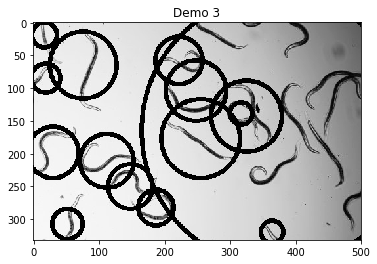

In [98]:
plt.imshow(demo_3, cmap=cm.Greys_r)
plt.title('Demo 3')
plt.show()

This one was almost perfect until it got the right side. We can see where the slide/plate was on the edge and the light gradient has interfered with the thresholding. 15/21 Nematodes (70%)

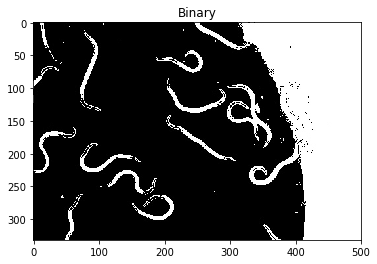

In [101]:
filename_binary = base_dir + 'binary_nem4.jpg'
demo_binary = imread(filename_binary, 0)

plt.imshow(demo_binary, cmap=cm.Greys_r)
plt.title('Binary')
plt.show()

These are random samples taken from google image search that were collected with very different techniques (different microscope settings for backlight for example). With a consistant source it should be possible to improve this process.

### Lessons Learned

This was a quick and dirty script for object detection.  We:  
 1) Smoothed over the image to remove minor debris.  Mainly because this was a "dirty" photo with a lot of grains.  
 2) Next we used a thresholding method to remove background pixels and focus on the "main" image.  
 3) Finally we used a contour detecting algogrithm to outline the major objects (which we then outlined).
 
For a non-machine learning pipeline, I suspect this is a pretty common setup.  In an industrial setup, they would have a controlled light environment and a clean backdrop that would make steps 1/2 much better.

For a machine learning project?  I originally had intended to use this workflow to pick out the nematodes and then cut out the images to form a sample for this type of pipeline.  The pictures could then be easily labeled to form a sample set.  

## Facial Recognition



In [14]:
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = CascadeClassifier(cascPath)

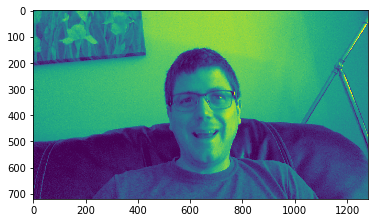

In [10]:
gray = cvtColor(img, COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

In [33]:
import numpy as np
import sys

cascPath = sys.argv[1]
faceCascade = CascadeClassifier(cascPath)

faces = faceCascade.detectMultiScale3(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30))

    # Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/objdetect/src/cascadedetect.cpp:1729: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [30]:
print(cascPath)
print(faceCascade)

-f
<CascadeClassifier 0x121d52b50>


In [13]:
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=CASCADE_SCALE_IMAGE)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [17]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img)
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'
